<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/new_class_mdl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# Get today's date and date one year ago
today = '2023-01-01'
one_year_ago = '2018-01-01'
# Format dates
today_str = today
one_year_ago_str = one_year_ago

# List of Nifty 50 tickers with '.NS' suffix for NSE stocks
nifty50_tickers = [
    'RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS',
    'HINDUNILVR.NS', 'HDFC.NS', 'KOTAKBANK.NS', 'ITC.NS', 'LT.NS',
    'SBIN.NS', 'BHARTIARTL.NS', 'ASIANPAINT.NS', 'AXISBANK.NS', 'BAJFINANCE.NS',
    'DMART.NS', 'MARUTI.NS', 'HCLTECH.NS', 'SUNPHARMA.NS', 'ULTRACEMCO.NS',
    'MM.NS', 'TECHM.NS', 'NTPC.NS', 'POWERGRID.NS', 'WIPRO.NS',
    'NESTLEIND.NS', 'INDUSINDBK.NS', 'BAJAJFINSV.NS', 'ADANIPORTS.NS', 'ONGC.NS',
    'TATASTEEL.NS', 'TITAN.NS', 'COALINDIA.NS', 'BAJAJ-AUTO.NS', 'JSWSTEEL.NS',
    'DIVISLAB.NS', 'HDFCLIFE.NS', 'DRREDDY.NS', 'BPCL.NS', 'GRASIM.NS',
    'EICHERMOT.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'HEROMOTOCO.NS', 'SBILIFE.NS',
    'SHREECEM.NS', 'TATAMOTORS.NS', 'IOC.NS', 'UPL.NS', 'GAIL.NS','^NSEI',
]

# Fetch data for the past one year
data = yf.download(
    tickers=nifty50_tickers,
    start=one_year_ago_str,
    end=today_str,
    interval='1d',
    group_by='ticker',
    auto_adjust=True
)

# Initialize an empty DataFrame to store percentage changes
pct_change_df = pd.DataFrame()

for ticker in nifty50_tickers:
    try:
        # Get the closing prices
        close_prices = data[ticker]['Close']
        # Calculate daily percentage change
        daily_pct_change = close_prices.pct_change() * 100
        # Create a DataFrame with Date and Daily Percentage Change
        temp_df = pd.DataFrame({
            'Date': daily_pct_change.index,
            'Ticker': ticker.replace('.NS', ''),
            'Daily Change (%)': daily_pct_change.values
        })
        # Append to the main DataFrame
        pct_change_df = pd.concat([pct_change_df, temp_df], ignore_index=True)
    except Exception as e:
        print(f"Could not process {ticker}: {e}")

# Pivot the DataFrame to have dates as index and tickers as columns
pivot_df = pct_change_df.pivot(index='Date', columns='Ticker', values='Daily Change (%)')



[*********************100%***********************]  51 of 51 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['MM.NS', 'HDFC.NS']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
<ipython-input-57-240e7ca2c665>:44: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  daily_pct_change = close_prices.pct_change() * 100


In [58]:
# Sort the DataFrame by Date
pivot_df = pivot_df.sort_index()
pivot_df['^NSEI']=pivot_df['^NSEI'].shift(-1)
# Save to CSV
pivot_df.to_csv('nifty50_daily_change.csv')

print("Daily percentage changes saved to 'nifty50_daily_change.csv'")


Daily percentage changes saved to 'nifty50_daily_change.csv'


In [59]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# For saving the model
import joblib

# Load the CSV file
data = pd.read_csv('/content/nifty50_daily_change.csv')
data.head(5)
# Ensure 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])
# Handle missing values
# Option 1: Drop rows with missing values
data=data.fillna(0)
print('1')
data.head(5)




1


,Date,ADANIPORTS,ASIANPAINT,AXISBANK,BAJAJ-AUTO,BAJAJFINSV,BAJFINANCE,BHARTIARTL,BPCL,BRITANNIA,...,SUNPHARMA,TATAMOTORS,TATASTEEL,TCS,TECHM,TITAN,ULTRACEMCO,UPL,WIPRO,^NSEI
0,2018-01-01 00:00:00+00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2018-01-02 00:00:00+00:00,-0.563007,-0.078699,-1.060985,0.167208,-1.367974,-0.057959,-2.150039,-1.730244,-1.734814,...,-0.331017,3.498634,0.983095,-0.544310,2.156632,-0.856351,-0.088110,2.342047,0.679204,0.009577
2,2018-01-03 00:00:00+00:00,2.579273,-0.074395,0.169783,-1.629868,-0.032347,-0.542132,0.319434,-0.980407,0.534794,...,-0.541796,-1.229230,0.774722,0.283133,1.070154,1.319305,1.167598,0.303830,-2.745534,0.589854
3,2018-01-04 00:00:00+00:00,0.539677,2.640321,-0.098125,0.721991,-0.723612,2.256160,0.926286,-0.686979,-1.165382,...,2.135126,-0.910337,3.442407,0.699216,0.596778,4.274197,1.012338,0.754067,0.548484,0.514525
4,2018-01-05 00:00:00+00:00,3.403690,1.126242,0.598305,0.471742,1.277020,3.449271,3.250476,-0.773142,0.382605,...,-0.421547,0.383763,1.374555,1.208098,0.554977,1.881519,1.157531,-0.953116,-0.673843,0.613230


In [60]:

# Option 2: Fill missing values (uncomment if you prefer this method)
# data.fillna(method='ffill', inplace=True)

# Create the target variable
# If '^NSEI' >= 0, set Target = 1 (Index went up)
# If '^NSEI' < 0, set Target = 0 (Index went down)
data['Target'] = np.where(data['^NSEI'] >= 0, 1, 0)
data_copy_=data["^NSEI"]
# Drop the original '^NSEI' column
data.drop('^NSEI', axis=1, inplace=True)
print('2')
print(data.head(2))
# Feature Engineering: Create lag features
feature_cols = [col for col in data.columns if col not in ['Date', 'Target']]
'''
# Add previous day's features (lag 1)
for col in feature_cols:
    data[col + '_lag1'] = data[col].shift(1)
'''
# Drop rows with NaN values after shifting

print('3')
print(data.head(5))
# Update feature columns after adding lag features
feature_cols = [col for col in data.columns if col not in ['Date', 'Target']]

# Define X and y
X = data[feature_cols]
y = data['Target']

# Split the data into training and testing sets while preserving time order
train_size = int(len(X) * 0.8)
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]


2
                       Date  ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  \
0 2018-01-01 00:00:00+00:00    0.000000    0.000000  0.000000    0.000000   
1 2018-01-02 00:00:00+00:00   -0.563007   -0.078699 -1.060985    0.167208   

   BAJAJFINSV  BAJFINANCE  BHARTIARTL      BPCL  BRITANNIA  ...  SUNPHARMA  \
0    0.000000    0.000000    0.000000  0.000000   0.000000  ...   0.000000   
1   -1.367974   -0.057959   -2.150039 -1.730244  -1.734814  ...  -0.331017   

   TATAMOTORS  TATASTEEL      TCS     TECHM     TITAN  ULTRACEMCO       UPL  \
0    0.000000   0.000000  0.00000  0.000000  0.000000     0.00000  0.000000   
1    3.498634   0.983095 -0.54431  2.156632 -0.856351    -0.08811  2.342047   

      WIPRO  Target  
0  0.000000       1  
1  0.679204       1  

[2 rows x 52 columns]
3
                       Date  ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  \
0 2018-01-01 00:00:00+00:00    0.000000    0.000000  0.000000    0.000000   
1 2018-01-02 00:00:00+00:00   -0.563007   -0.078

In [61]:
X_train.shape

(988, 50)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:05:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:05:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:05:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:05:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:05:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

Voting Classifier Accuracy: 0.532258064516129

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.11      0.19       124
           1       0.52      0.95      0.67       124

    accuracy                           0.53       248
   macro avg       0.61      0.53      0.43       248
weighted avg       0.61      0.53      0.43       248



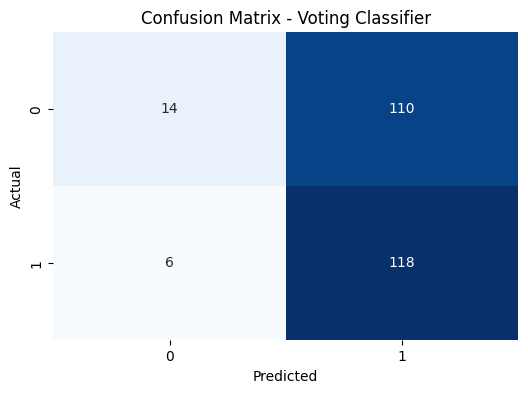

['voting_classifier_model.pkl']

In [65]:

# Initialize classifiers
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
svc_clf = SVC(probability=True, random_state=42)

# Time Series Cross-Validation
tscv = TimeSeriesSplit(n_splits=5)

# Hyperparameter tuning for Random Forest
params_rf = {'n_estimators': [100, 200], 'max_depth': [3, 5,7]}
grid_search_rf = GridSearchCV(rf_clf, param_grid=params_rf, cv=tscv, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
rf_clf_best = grid_search_rf.best_estimator_

# Hyperparameter tuning for XGBoost
params_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5,7],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_search_xgb = GridSearchCV(xgb_clf, param_grid=params_xgb, cv=tscv, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
xgb_clf_best = grid_search_xgb.best_estimator_

# Hyperparameter tuning for SVC
params_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svc = GridSearchCV(svc_clf, param_grid=params_svc, cv=tscv, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)
svc_clf_best = grid_search_svc.best_estimator_

# Create a Voting Classifier with the best estimators
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_clf_best),
        ('xgb', xgb_clf_best),
        ('svc', svc_clf_best)
    ],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

# Train the Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = voting_clf.predict(X_test)
#y_pred = voting_clf.predict(X_test)[:, 1]  # Probabilities of class 1 (market up)

# Evaluate the model
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

# Backtesting (Optional)
# Add predictions to the test set
data_test = data.iloc[train_size:].copy()
data_test['Predictions'] = y_pred

# Re-add the '^NSEI' returns if available (since we dropped it earlier)
# For demonstration purposes, let's assume we have a column 'Market_Return' that represents '^NSEI' daily returns
# If you have the actual '^NSEI' returns, include them here
# data_test['Market_Return'] = ... # Replace with actual market returns


# Save the trained model
joblib.dump(voting_clf, 'voting_classifier_model.pkl')

# Load the model for future use (if needed)
# voting_clf_loaded = joblib.load('voting_classifier_model.pkl')


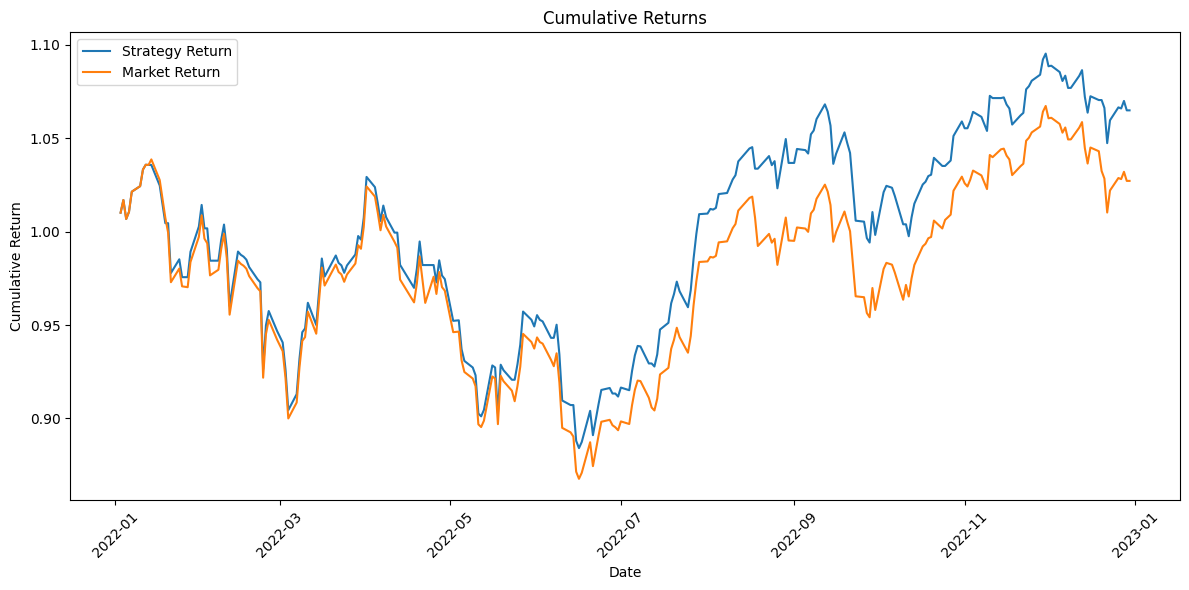

In [66]:
# Since we don't have 'Market_Return', we'll use the average of the features as a placeholder
data_test['Market_Return'] = data_copy_.iloc[-248:].values

# Calculate strategy returns
data_test['Strategy_Return'] = data_test['Predictions'] * data_test['Market_Return']

# Calculate cumulative returns
data_test['Cumulative_Strategy_Return'] = (1 + data_test['Strategy_Return'] / 100).cumprod()
data_test['Cumulative_Market_Return'] = (1 + data_test['Market_Return'] / 100).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(data_test['Date'], data_test['Cumulative_Strategy_Return'], label='Strategy Return')
plt.plot(data_test['Date'], data_test['Cumulative_Market_Return'], label='Market Return')
plt.legend()
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()